In [3]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 14.4 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234927 sha256=a30eade2193ece0969d0c98c1788815467d29aef3cfce213bf88ce3d40167890
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji


In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
sns.set_style("darkgrid")
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import re, string, nltk
import emoji, bz2
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.layers import Embedding
#from tensorflow.keras.preprocessing.sequence import pad_sequences   -------------------------> this ibrary is not working
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
def clean_text(df, field):
    df[field] = df[field].str.replace(r"@"," at ")
    df[field] = df[field].str.replace("#[^a-zA-Z0-9_]+"," ")
    df[field] = df[field].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
    df[field] = df[field].str.replace(r"http\S+","")
    df[field] = df[field].str.lower()
    return df

clean_text(df,'review')
#clean_text(result,2)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [9]:
df=df.replace({'sentiment' : { 'positive' : 1,  'negative': -1 }})

In [10]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,-1
4,"petter mattei's ""love in the time of money"" is...",1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",-1
49997,i am a catholic taught in parochial elementary...,-1
49998,i'm going to have to disagree with the previou...,-1


In [11]:
# Applying Lemmmatizer to remove tenses from texts.
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub('[^a-zA-Z0-9]',' ',text)
    #text= re.sub(emoji.get_emoji_regexp(),"",text)
    text = [lemmatizer.lemmatize(word) for word in text.split() if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

df["review"] = df['review'].apply(preprocess_text)
#result["clean_text"] = result[2].apply(preprocess_text)

In [11]:
df

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,1
1,wonderful little production br br filming tech...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,-1
4,petter mattei love time money visually stunnin...,1
...,...,...
49995,thought movie right good job creative original...,1
49996,bad plot bad dialogue bad acting idiotic direc...,-1
49997,catholic taught parochial elementary school nu...,-1
49998,going disagree previous comment side maltin on...,-1


In [12]:
X_train,X_test,y_train,y_test=train_test_split(df['review'],df['sentiment'],test_size=0.3,random_state=27)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf2 = TfidfVectorizer(use_idf=True, tokenizer=word_tokenize)
X_train_tf2 = tfidf2.fit_transform(X_train)
X_test_tf2 = tfidf2.transform(X_test)

In [14]:
print(X_train_tf2)

  (0, 45325)	0.1097487854214049
  (0, 6275)	0.026972271716375038
  (0, 52664)	0.1097487854214049
  (0, 55216)	0.047642320281166564
  (0, 29850)	0.045156957415915425
  (0, 40272)	0.04032371473564831
  (0, 74399)	0.02415431633687442
  (0, 1750)	0.03769204490007221
  (0, 40180)	0.04041374509681191
  (0, 37061)	0.05793643119647653
  (0, 1780)	0.04113983640841686
  (0, 56215)	0.054070999488600675
  (0, 32180)	0.06929053722822821
  (0, 50802)	0.03925062547140477
  (0, 41202)	0.021290612529508753
  (0, 16731)	0.039403024800696566
  (0, 38755)	0.04792184167521083
  (0, 45663)	0.032245436398263744
  (0, 13067)	0.041158060398763886
  (0, 54112)	0.03382472485866247
  (0, 62092)	0.05703137709059108
  (0, 43067)	0.04584587553041102
  (0, 9584)	0.04178496439294755
  (0, 74161)	0.05786874927040942
  (0, 22472)	0.026934560751792503
  :	:
  (34999, 32150)	0.05562407864288941
  (34999, 65027)	0.058408253118588015
  (34999, 60279)	0.060176517491738676
  (34999, 68280)	0.05988089886971837
  (34999, 68368)

In [16]:
rf = RandomForestClassifier()
rf.fit(X_train_tf2, y_train)

RandomForestClassifier()

In [17]:
from sklearn.metrics import roc_auc_score
y_pred = rf.predict(X_test_tf2)
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
roc = roc_auc_score(y_test,y_pred)
print(f"Accuracy: {acc*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred)}")
print(report)

Accuracy: 85.43333333333332% and Roc Auc Score:0.8543326726516765
              precision    recall  f1-score   support

          -1       0.86      0.85      0.85      7532
           1       0.85      0.85      0.85      7468

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



In [18]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
xgb = XGBClassifier(eval_metric="mlogloss")
xgb.fit(X_train_tf2, y_train)

XGBClassifier(eval_metric='mlogloss')

In [19]:
y_pred2 = xgb.predict(X_test_tf2)
acc2 = accuracy_score(y_pred2, y_test)
report2 = classification_report(y_test, y_pred2)
roc2 = roc_auc_score(y_test,y_pred2)
print(f"Accuracy: {acc2*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred2)}")
print(report2)

Accuracy: 80.60000000000001% and Roc Auc Score:0.8062809178961765
              precision    recall  f1-score   support

          -1       0.85      0.74      0.79      7532
           1       0.77      0.87      0.82      7468

    accuracy                           0.81     15000
   macro avg       0.81      0.81      0.81     15000
weighted avg       0.81      0.81      0.81     15000



In [20]:
lgb = LGBMClassifier()
lgb.fit(X_train_tf2, y_train)

LGBMClassifier()

In [21]:
y_pred_lgb = lgb.predict(X_test_tf2)
acc_lgb = accuracy_score(y_pred_lgb, y_test)
report_lgb = classification_report(y_test, y_pred_lgb)
roc_lgb = roc_auc_score(y_test,y_pred_lgb)
print(f"Accuracy: {acc_lgb*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred_lgb)}")
print(report_lgb)

Accuracy: 85.97333333333333% and Roc Auc Score:0.8598087190067246
              precision    recall  f1-score   support

          -1       0.87      0.84      0.86      7532
           1       0.85      0.88      0.86      7468

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



In [22]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tf2, y_train)

MultinomialNB()

In [23]:
y_pred3 = nb.predict(X_test_tf2)
acc3 = accuracy_score(y_pred3, y_test)
report3 = classification_report(y_test, y_pred3)
roc3 = roc_auc_score(y_test,y_pred3)
print(f"Accuracy: {acc3*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred3)}")
print(report3)

Accuracy: 86.46000000000001% and Roc Auc Score:0.8645477563893786
              precision    recall  f1-score   support

          -1       0.86      0.88      0.87      7532
           1       0.87      0.85      0.86      7468

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



In [24]:
gb = GradientBoostingClassifier()
gb.fit(X_train_tf2, y_train)

GradientBoostingClassifier()

In [25]:
y_pred4 = gb.predict(X_test_tf2)
acc4 = accuracy_score(y_pred4, y_test)
report4 = classification_report(y_test, y_pred4)
roc4 = roc_auc_score(y_test,y_pred4)
print(f"Accuracy: {acc4*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred4)}")
print(report4)

Accuracy: 80.9% and Roc Auc Score:0.8092522430986122
              precision    recall  f1-score   support

          -1       0.85      0.75      0.80      7532
           1       0.78      0.87      0.82      7468

    accuracy                           0.81     15000
   macro avg       0.81      0.81      0.81     15000
weighted avg       0.81      0.81      0.81     15000



In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train_tf2, y_train)
y_pred5 = dt.predict(X_test_tf2)
acc5 = accuracy_score(y_pred5, y_test)
report5 = classification_report(y_test, y_pred5)
roc5 = roc_auc_score(y_test,y_pred5)
print(f"Accuracy: {acc5*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred5)}")
print(report5)

Accuracy: 71.89999999999999% and Roc Auc Score:0.7190076846910066
              precision    recall  f1-score   support

          -1       0.72      0.72      0.72      7532
           1       0.72      0.72      0.72      7468

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000



In [27]:
from sklearn.metrics import precision_score
ps = precision_score(y_test, y_pred)
ps_lgb = precision_score(y_test,y_pred_lgb)
ps2 = precision_score(y_test, y_pred2)
ps3 = precision_score(y_test, y_pred3)
ps4 = precision_score(y_test, y_pred4)
ps5 = precision_score(y_pred5,y_test)

In [28]:
accuracys = [acc,acc2,acc3,acc4,acc5,acc_lgb]
roc_scores = [roc, roc2, roc3, roc4,roc5, roc_lgb]
precision_scores = [ps,ps2,ps3,ps4,ps5,ps_lgb]
models = {"Random Forest":rf,"XGboost":xgb,"Naive Bayes":nb,"Gradient Boosting":gb,"Decision Tree":dt,"LGB Machine":lgb}

model_df = pd.DataFrame({"Models":models.keys(),"Accuracy":accuracys,"Precision Score":precision_scores,"Roc Scores": roc_scores}).sort_values("Roc Scores",ascending=False)

In [29]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [30]:
# using tokenizer to transform text messages into training and testing set
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [31]:
X_train_seq_padded = pad_sequences(X_train_seq, maxlen=64)
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=64)

In [32]:
X_train_seq_padded[0]

array([47809,     1,     1,   210,  1346, 17480,   899,    83,   150,
         172,    12,    50, 19894,    56, 13489,  6556,   930,  2308,
          48,    58,   383,     1,     1,    78,   562,  1667,   467,
         139,  1346,   340,    14,   109,    14,     2,    62,   725,
           2, 17480,   386,   295,    13,    58,    50,   270,  4690,
           2,  1353,    62,    26,   368,    32,  2389,  1809,   321,
         238,    25,   314,   551,   732, 47810,    46,     1,     1,
       47811], dtype=int32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          4934720   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              132000    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               25728     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5,092,577
Trainable params: 5,092,577
Non-trainable params: 0
_________________________________________________________________


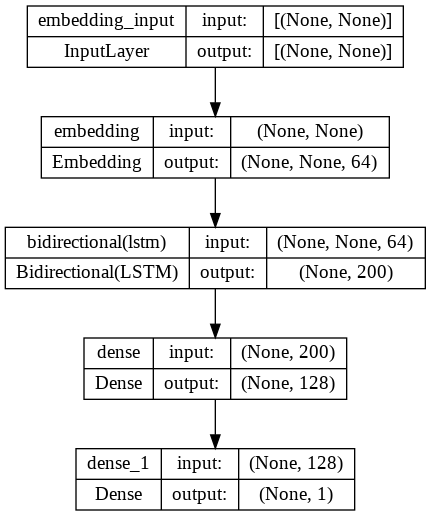

In [33]:
# construct model
BATCH_SIZE = 64

from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1,64))
model.add(Bidirectional(LSTM(100, dropout=0,recurrent_dropout=0)))
model.add(Dense(128, activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile("adam","binary_crossentropy",metrics=["accuracy"])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [34]:
# Used for preventing ovefitting
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5,verbose=True)

In [36]:
history = model.fit(X_train_seq_padded, y_train,batch_size=BATCH_SIZE,epochs=5,
                    validation_data=(X_test_seq_padded, y_test),callbacks=[early_stop])

Epoch 1/5
547/547 [==============================] - 105s 192ms/step - loss: -68257.9219 - accuracy: 0.3008 - val_loss: -76573.4844 - val_accuracy: 0.3067
Epoch 2/5
547/547 [==============================] - 103s 189ms/step - loss: -111864.2188 - accuracy: 0.3159 - val_loss: -107241.9141 - val_accuracy: 0.2758
Epoch 3/5
547/547 [==============================] - 103s 188ms/step - loss: -140394.0156 - accuracy: 0.2906 - val_loss: -108253.3438 - val_accuracy: 0.1472
Epoch 4/5
547/547 [==============================] - 105s 192ms/step - loss: -155054.0156 - accuracy: 0.1563 - val_loss: -141956.0938 - val_accuracy: 0.1285
Epoch 5/5
547/547 [==============================] - 105s 193ms/step - loss: -207052.7812 - accuracy: 0.1557 - val_loss: -203471.3750 - val_accuracy: 0.1433


In [37]:
from sklearn.metrics import roc_auc_score
pred_train = model.predict(X_train_seq_padded)
pred_test = model.predict(X_test_seq_padded)
print('LSTM Recurrent Neural Network baseline: ' + str(roc_auc_score(y_train, pred_train)))
print('LSTM Recurrent Neural Network: ' + str(roc_auc_score(y_test, pred_test)))

469/469 [==============================] - 10s 22ms/step
LSTM Recurrent Neural Network baseline: 0.6725747909113009
LSTM Recurrent Neural Network: 0.6337200520770369


In [38]:
model.evaluate(X_test_seq_padded, y_test)

469/469 [==============================] - 9s 19ms/step - loss: -203471.2500 - accuracy: 0.1433


[-203471.25, 0.14326666295528412]

Text(0.5, 1.0, 'Training and Validation Accuracy')

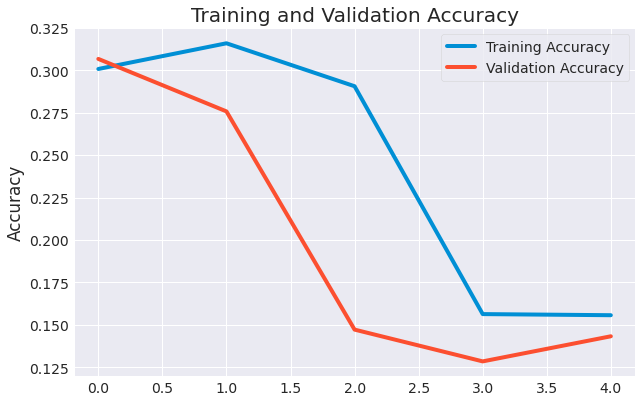

In [39]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(9,6))
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc,label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Loss')

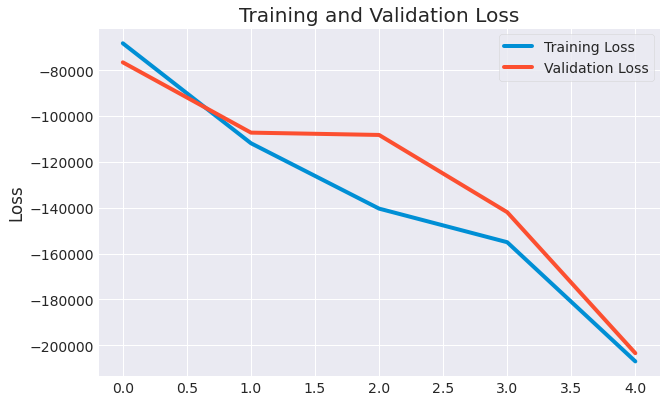

In [40]:
plt.figure(figsize=(9,6))
plt.plot(loss,label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.ylabel("Loss")
plt.title("Training and Validation Loss")